In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [17]:
#load dataset
mnist=tf.keras.datasets.mnist



In [18]:
#splitting into train and test data- x:pixel data, y:classiffication digits
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [4]:
#scaling to 0-1
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test =tf.keras.utils.normalize(x_test,axis=1)

In [5]:
 # Create a neural network model
# Add one flattened input layer for the pixels
# Add two dense hidden layers
# Add one dense output layer for the 10 digits
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu')) 
model.add(tf.keras.layers.Dense(10,activation='softmax')) 

 # Compiling and optimizing model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
#training the model
model.fit(x_train,y_train,epochs=3)
model.save('handwritten_model')

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2656 - accuracy: 0.9216
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1079 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0728 - accuracy: 0.9767
INFO:tensorflow:Assets written to: handwritten_model\assets


In [7]:
#loading model
model= tf.keras.models.load_model('handwritten_model')

In [8]:
#model evaluation
loss,accuracy=model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0970 - accuracy: 0.9706
0.0970030426979065
0.9706000089645386


1/1 [==============================] - 0s 19ms/step
The number is probably a 1


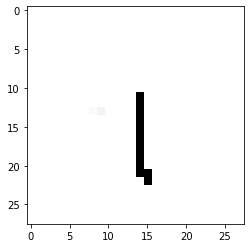

1/1 [==============================] - 0s 19ms/step
The number is probably a 2


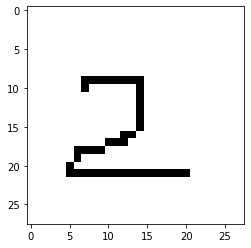

1/1 [==============================] - 0s 20ms/step
The number is probably a 3


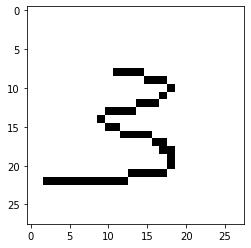

1/1 [==============================] - 0s 19ms/step
The number is probably a 4


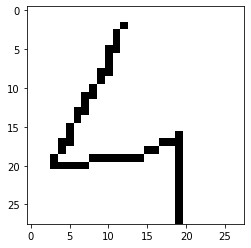

1/1 [==============================] - 0s 20ms/step
The number is probably a 5


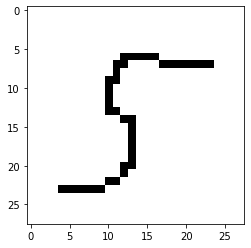

1/1 [==============================] - 0s 20ms/step
The number is probably a 6


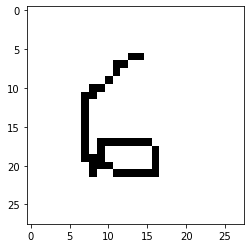

In [20]:

# Load custom images and predict them
image_number = 1
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1   